Exercises July 9

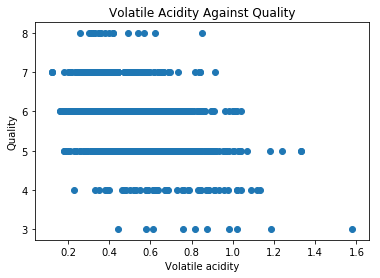

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
import pandas as pd #Pandas creates a table for python
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe() #Generates descriptive statistics that summarize the central tendency, dispersion 
              # and shape of a dataset’s distribution, excluding NaN values. 
            #Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 
            #The output will vary depending on what is provided. Refer to the notes below for more detail.
            
import matplotlib.pylab as plt
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity Against Quality')
plt.figure(figsize=(15,15))
plt.show()
pd.DataFrame(df).corr('pearson', min_periods=1)

Linear Regression with Training and Testing split

In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split #use this to split the data
df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print 'R-squared:', regressor.score(X_test, y_test)


R-squared: 0.346689273561


In [14]:
import pandas as pd
from sklearn. cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print scores.mean(), scores

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


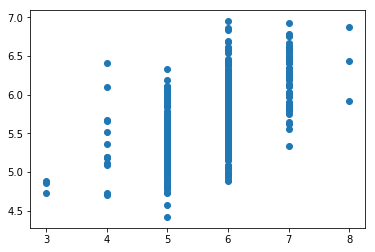

In [15]:
plt.scatter(y_test, y_predictions)
plt.show()

In [16]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
regressor = SGDRegressor(loss='squared_loss')
scores1 = cross_val_score(regressor, X_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores1
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(X_train, y_train)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.31439479  0.34703977  0.4003099   0.26384157  0.37192066]
Average cross validation r-squared score: 0.290041628842
Test set r-squared score 0.342212184042


/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha